In [2]:
# https://stackoverflow.com/questions/35162889/python-pyusb-hid-feature-report
# https://github.com/Lange/node-elgato-stream-deck/blob/master/index.js
# https://github.com/danieltian/stream-deck-api/blob/master/lib/stream-deck.js

import os, hid
import numpy as np
from PIL import Image


In [54]:
# constants

HID_VENDOR = 4057
HID_PRODUCT = 96

NUM_KEYS = 15;
ICON_SIZE = 72,72

NUM_TOTAL_PIXELS = ICON_SIZE[0]*ICON_SIZE[1];
NUM_PAGE1_PIXELS = 2583;
NUM_PAGE2_PIXELS = NUM_TOTAL_PIXELS-NUM_PAGE1_PIXELS;

RESET_DATA = [0x0B, 0x63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0];
BRIGHTNESS_DATA = [0x05, 0x55, 0xAA, 0xD1, 0x01, 0x0A, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0];

HEADER_PAGE1 = [0x02, 0x01, 0x01, 0x00, 0x00, 0, 0x00, 0x00,0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x42, 0x4d, 0xf6, 0x3c, 0x00, 0x00, 0x00, 0x00,0x00, 0x00, 0x36, 0x00, 0x00, 0x00, 0x28, 0x00, 0x00, 0x00, 0x48, 0x00, 0x00, 0x00, 0x48, 0x00, 0x00, 0x00, 0x01, 0x00, 0x18, 0x00, 0x00, 0x00, 0x00, 0x00, 0xc0, 0x3c, 0x00, 0x00, 0xc4, 0x0e, 0x00, 0x00, 0xc4, 0x0e, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00, 0x00]
HEADER_PAGE2 = [0x02, 0x01, 0x02, 0x00, 0x01, 0]


In [12]:
#elg


elg = hid.device(HID_VENDOR, HID_PRODUCT)
elg.open(HID_VENDOR, HID_PRODUCT)

In [13]:
#elg


# send reset command
elg.send_feature_report(RESET_DATA)

17

In [ ]:
#elg
bright = 90


# brightness to x
BRIGHTNESS_DATA[5] = bright
elg.send_feature_report(BRIGHTNESS_DATA)

In [70]:
#elg
key = 11
icon = 'mushroom'
pad = 200

# read icon
ico = Image.open(os.path.join("icons",icon+".png"))

# pad with blank space if don't know
padded_size = ico.size[0]+pad,ico.size[1]+pad
padded_im = Image.new("RGBA", padded_size)
padded_im.paste(ico, (int((padded_size[0]-ico.size[0])/2),int((padded_size[1]-ico.size[1])/2)))
ico = padded_im

# ensure final image is 72x72
ico.thumbnail(ICON_SIZE)

# buffer pixel data into a list and shuffle colors to BGR
import numpy as np
icobuffer = list(ico.getdata()) # RGBA
pixels = np.array([])
for px in range(0, NUM_TOTAL_PIXELS):
    r = icobuffer[px][0]
    g = icobuffer[px][1]
    b = icobuffer[px][2]
    pixels = np.concatenate([pixels,np.array([b,g,r])])
    
# send pixel data to elg
header = HEADER_PAGE1
header[5] = key
msg = header+pixels[range(0,NUM_PAGE1_PIXELS*3)].astype(int).tolist()
elg.write(msg)

header = HEADER_PAGE2
header[5] = key
msg = header+pixels[range((NUM_PAGE1_PIXELS-3)*3-1,NUM_TOTAL_PIXELS*3)].astype(int).tolist()
elg.write(msg)


8191

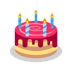

In [ ]:
## TO DO

# text to image to button

# key mapping

# button listener

2602.3333333333335